# Project 1.1 - 당뇨병 수치 맞추기

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### (1) 데이터 가져오기

In [26]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

### (2) 모델에 입력할 데이터 X, 예측할 데이터 y 준비하기

In [27]:
# data와 target은 이미 ndarray로 되어있다.
df_X = diabetes.data
df_y = diabetes.target

### (3) train 데이터와 test 데이터로 분리하기

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=52)

### (4) 모델 준비하기

In [29]:
W = np.random.rand(df_X.shape[1])
b = np.random.rand()

In [30]:
def model(X, W, b):
    y_pred = (X * W).sum(axis=1) + b
    return y_pred

### (5) 손실함수 loss 정의하기

In [31]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [32]:
def loss(X, W, b, y):
    y_pred = model(X, W, b)
    L = MSE(y_pred, y)
    return L

### (6) 기울기를 구하는 gradient 함수 구현하기

In [33]:
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 1/N * 2 * (y_pred - y).sum()
    return dW, db

### (7) 하이퍼 파라미터인 learning rate 설정하기

In [34]:
learning_rate = 0.1

### (8) 모델 학습하기

In [35]:
losses = []
iteration = 10000

for i in range(1, iteration + 1):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW
    b -= learning_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 5240.8207
Iteration 200 : Loss 4749.7634
Iteration 300 : Loss 4387.9176
Iteration 400 : Loss 4117.9664
Iteration 500 : Loss 3913.7216
Iteration 600 : Loss 3756.7689
Iteration 700 : Loss 3634.1282
Iteration 800 : Loss 3536.6213
Iteration 900 : Loss 3457.7332
Iteration 1000 : Loss 3392.8165
Iteration 1100 : Loss 3338.5366
Iteration 1200 : Loss 3292.4831
Iteration 1300 : Loss 3252.8989
Iteration 1400 : Loss 3218.4893
Iteration 1500 : Loss 3188.2894
Iteration 1600 : Loss 3161.5701
Iteration 1700 : Loss 3137.7722
Iteration 1800 : Loss 3116.4600
Iteration 1900 : Loss 3097.2885
Iteration 2000 : Loss 3079.9798
Iteration 2100 : Loss 3064.3063
Iteration 2200 : Loss 3050.0788
Iteration 2300 : Loss 3037.1380
Iteration 2400 : Loss 3025.3478
Iteration 2500 : Loss 3014.5905
Iteration 2600 : Loss 3004.7638
Iteration 2700 : Loss 2995.7777
Iteration 2800 : Loss 2987.5527
Iteration 2900 : Loss 2980.0181
Iteration 3000 : Loss 2973.1106
Iteration 3100 : Loss 2966.7735
Iteration 3200 : 

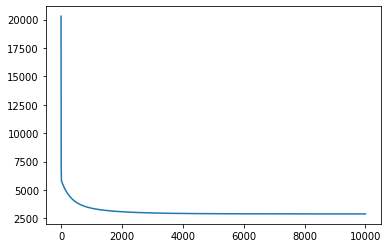

In [36]:
plt.plot(losses)

### (9) test 데이터에 대한 성능 확인하기

In [37]:
prediction = model(X_test, W, b)
print(loss(X_test, W, b, y_test))

2904.020266664164


### (10) 정답 데이터와 예측한 데이터 시각화하기

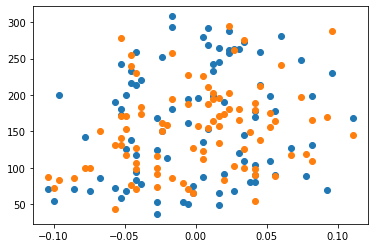

In [38]:
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], prediction)
plt.show()